In [165]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [166]:
train = pd.read_csv("train_LoanPrediction_Preprocessed.csv")
test = pd.read_csv("test_LoanPrediction_Preprocessed.csv")

In [167]:
train.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Loan_Status
0,0,1,0,1,0,1,0,0,1,0,...,1,0,0,4583,1508.0,128.0,360.0,1.0,LP001003,N
1,0,1,0,1,1,0,0,0,1,0,...,0,0,1,3000,0.0,66.0,360.0,1.0,LP001005,Y
2,0,1,0,1,1,0,0,0,0,1,...,0,0,1,2583,2358.0,120.0,360.0,1.0,LP001006,Y
3,0,1,1,0,1,0,0,0,1,0,...,0,0,1,6000,0.0,141.0,360.0,1.0,LP001008,Y
4,0,1,0,1,0,0,1,0,1,0,...,0,0,1,5417,4196.0,267.0,360.0,1.0,LP001011,Y


In [168]:
test.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Loan_Status
0,0,1,0,1,1,0,0,0,1,0,...,0,0,1,5720,0.0,110.0,360.0,1.0,LP001015,NaN
1,0,1,0,1,0,1,0,0,1,0,...,0,0,1,3076,1500.0,126.0,360.0,1.0,LP001022,NaN
2,0,1,0,1,0,0,1,0,1,0,...,0,0,1,5000,1800.0,208.0,360.0,1.0,LP001031,NaN
3,0,1,1,0,1,0,0,0,0,1,...,0,0,1,3276,0.0,78.0,360.0,1.0,LP001051,NaN
4,0,1,0,1,1,0,0,0,0,1,...,0,0,1,2165,3422.0,152.0,360.0,1.0,LP001054,NaN


In [169]:
train_y_all = pd.concat([train[["Loan_ID","Loan_Status"]]])
train_y_all = train_y_all.iloc[0:367]
train_y_all.shape

(367, 2)

In [141]:
train_X = train.drop(columns= ["Loan_ID","Loan_Status"])

In [142]:
test_X = test.drop(columns= ["Loan_ID","Loan_Status"])

In [143]:
train = train.iloc[1:368]

In [144]:
train_y = np.where(train["Loan_Status"]=="N",0,1)

In [145]:
train_y.shape

(367,)

In [146]:
sample = pd.read_csv("sample_submission.csv")

In [26]:
sample = sample.drop(columns= ["Loan_ID"])

In [27]:
sample["Loan_Status"] = np.where(sample["Loan_Status"]=="N",0,1)

In [147]:
sample.shape

(367, 2)

In [148]:
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    #pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    print("result", pred_train)
    #sample
    sample.to_csv(filename)

In [ ]:
X = train
y = data["Gender"]

In [158]:
train_tmp = train.drop(columns= ["Loan_Status","Loan_ID"])
train_tmp = train_tmp.iloc[1:368]
test_tmp = test.drop(columns= ["Loan_Status","Loan_ID"])

In [159]:
train_tmp.shape

(366, 20)

In [160]:
test_tmp.shape

(289, 20)

In [161]:
X = pd.concat([train_tmp,test_tmp])
X = X.iloc[1:368]
y = train[["Loan_ID","Loan_Status"]]

In [170]:
train_X, test_X, train_y, test_y = train_test_split(train_X,train_y, test_size=0.3, random_state = 0)

In [171]:
model = LogisticRegression()

In [173]:
model.fit(train_X, train_y)

ValueError: bad input shape (179, 2)

In [32]:
model.coef_

array([[-9.10839553e-02,  1.93910503e-01, -1.81617109e-01,
         2.84443657e-01,  1.48461281e-01, -2.65333448e-01,
         2.48092527e-01, -2.83938124e-02,  3.83762035e-01,
        -2.80935487e-01,  1.39386058e-01, -3.65595100e-02,
        -3.75897408e-01,  7.83198143e-01, -3.04474187e-01,
        -1.03620035e-06, -5.64962070e-05, -3.02014319e-03,
        -4.82326073e-03,  2.65153787e+00]])

In [33]:
model.intercept_

array([0.10777492])

In [34]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [35]:
def metric_res(acctual, pred):
    print("confusion_matrix ", confusion_matrix(acctual, pred))

In [38]:
metric_res(train_y,train_pred)

confusion_matrix  [[ 69  79]
 [ 11 321]]


RMSE of Train Data =  0.38012195032587065
Cross validation Score  =  0.3936362882368979
result [ 0.72986278  0.83841242  0.74766689  0.73487796  0.75170465  0.76541502
  0.25719601  0.83112078  0.70318392  0.87856874  0.75808561  0.68683444
  0.92843839  0.74078266  0.033895    0.73420861  0.10718028  0.64722235
  0.19490946  0.90449994  0.92357488  0.7973549   0.7133414   0.76067616
  0.64727578  0.93263526  0.62981229  0.86779782  0.65100766  0.78222086
  0.75848881  0.76001455  0.91864335  0.80977913  0.82344518  0.07409483
  0.77075923  0.82086074  0.80051898  0.80461568  0.85933325 -0.02798855
  0.97619917  0.93983315  0.77486189  0.73491182  0.76633114  0.79698366
  0.86257069  0.02573767  0.13112781  0.84822068  0.00934462  0.70231406
  0.81777708  0.1229389   0.78250086  0.8915708   0.87952546  0.90967389
  0.72857903  0.67614715  0.73670722  0.24290441  0.80476643  0.77214148
  0.82250535  0.8250505   0.93203607  0.70806862  0.8864119   0.9141418
  0.92514147  0.80169737  0.85

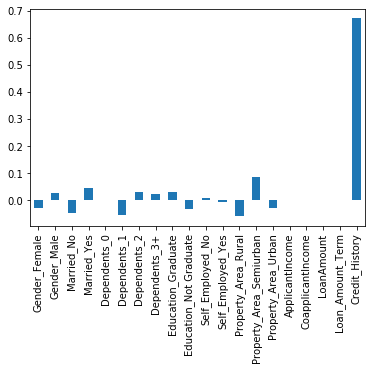

In [42]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression.csv" )